In [1]:
from matplotlib import pyplot as plt 

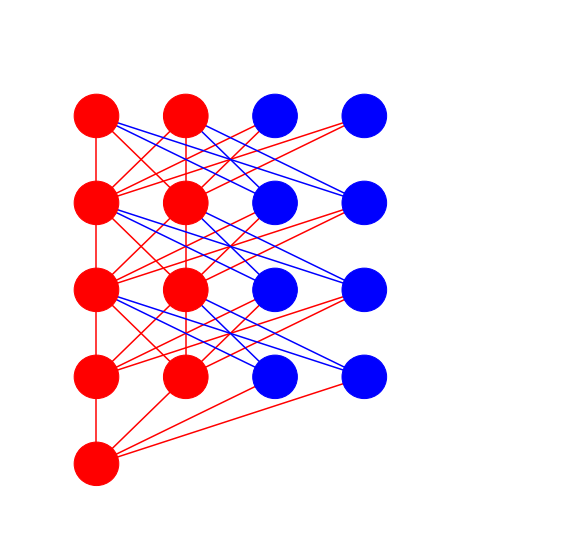

In [73]:
chain_length = 4
npops = 2

R_CIRC = 4
H_DIST = 16
V_DIST = 16

plt.figure(figsize=(10, 10))
plt.axis([0, 100, 0, 100])
plt.axis("off")

def create_neuron(cur_loc, inh=False):
    color = 'red'
    if inh:
        color = 'blue'

    circ = plt.Circle(
            cur_loc, 
            radius=R_CIRC,
            color=color,
            zorder=2
    )
    plt.gca().add_artist(circ)

def connect_to_next_layer(cur_loc, height, inh=False):
    color = 'red'
    all_neurons_factor = 2
    if inh:
        all_neurons_factor = 1
        color = 'blue'
    for p in range(1, (all_neurons_factor * npops) + 1):
        next_loc = p * H_DIST, (height + 2) * V_DIST
        plt.plot(
            [cur_loc[0], next_loc[0]], 
            [cur_loc[1], next_loc[1]], 
            color=color
        )
    
def create_initial_neurons():
    init_exc_loc = H_DIST, V_DIST
    #init_inh_loc = 2 * H_DIST, V_DIST

    create_neuron(init_exc_loc, inh=False)
    connect_to_next_layer(init_exc_loc, 0, inh=False)
    #create_neuron(init_inh_loc, inh=True)
    #connect_to_next_layer(init_inh_loc, 0, inh=True)

create_initial_neurons()
    
for c in range(chain_length):
    # Exhibitors
    for p in range(1, npops + 1):
        cur_loc = p * H_DIST, (c + 2) * V_DIST
        
        create_neuron(cur_loc, inh=False)
        if not c == chain_length -1:
            connect_to_next_layer(cur_loc, c + 1, inh=False)

    # Inhibitors
    for p in range(1, npops + 1):
        cur_loc = (npops + p) * H_DIST, (c + 2) * V_DIST
        
        create_neuron(cur_loc, inh=True)
        if not c == chain_length -1:
            connect_to_next_layer(cur_loc, c + 1, inh=True)